# **Tutorial 2: What is an Extreme Event? Empirical Return Levels**

**Week 2, Day 4, Extremes & Vulnerability**

**Content creators:** Matthias Aengenheyster, Joeri Reinders

**Content reviewers:** Younkap Nina Duplex, Sloane Garelick, Zahra Khodakaramimaghsoud, Peter Ohue, Laura Paccini, Jenna Pearson, Agustina Pesce, Derick Temfack, Peizhen Yang, Cheng Zhang, Chi Zhang, Ohad Zivan

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS

# **Tutorial Objectives**

In this second tutorial, you will calculate the precipitation levels associated with the 50, 100, and 500-year events using the empirical method.

By the end of this tutorial, you will have the ability to:

- Calculate empirical return levels
- Visualize a data record using a return-level plot

# **Setup**

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import os
import pooch

In [2]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

In [3]:
# download file: 'precipitationGermany_1920-2022.csv'
url_precipitationGermany = "https://osf.io/xs7h6/download"


data = pd.read_csv(pooch.retrieve(url_precipitationGermany, known_hash=None),
                   index_col=0).set_index('years')
data.columns=['precipitation']
precipitation = data.precipitation

In [4]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

# **Section 1: Calculating Return Levels**

The 100-year event represents a precipitation level that is expected to occur only once every 100 years, indicating a storm event with a 1% chance of occurring in any given year. Similarly, the 2-year event has a 50% chance of occurring annually. These return periods, as they are commonly referred to, play a crucial role in policymaking and infrastructure design. For instance, bridges are constructed to withstand 100-year flood events, evacuation plans are tailored for 50-year earthquakes, and nuclear power plants are engineered to withstand 10,000-year storms.

To determine the return levels associated with a specific return period, there are two approaches: empirical calculation and the use of probability density functions (PDF) within a distribution. In this tutorial, we will first focus on the empirical method.

First open the precipitation record in Germany and plot it over time: 

Text(0, 0.5, 'annual maximum daily precipitation (mm/day)')

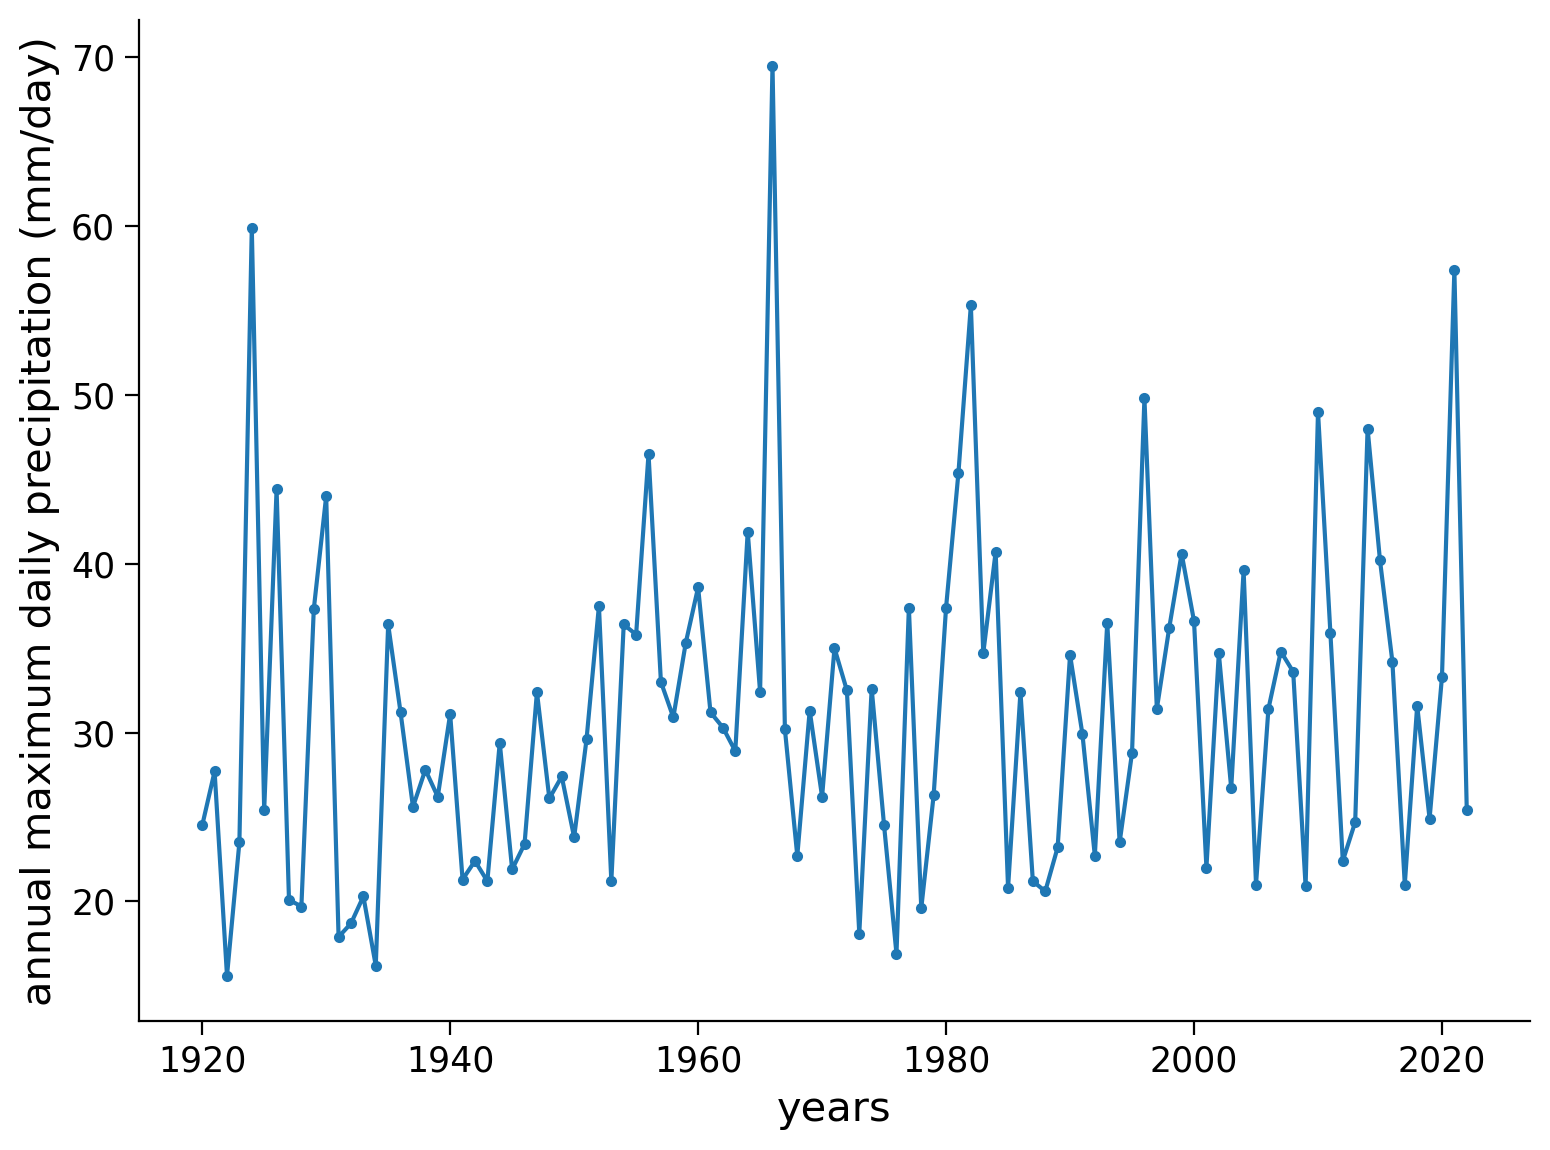

In [5]:
precipitation.plot.line(style='.-')
plt.ylabel('annual maximum daily precipitation (mm/day)')

In this tutorial, we will calculate the return period for each event in the dataset, specifically for each maximum precipitation value recorded in a given year. To accomplish this, we will begin by ranking the precipitation levels in descending order using the sort function. The sorted data will be saved in the first column of a matrix named "precip" with four columns, and the number of rows will correspond to the number of data entries.

In the second column of the matrix, we will store the ranks assigned to each precipitation value, with the highest value assigned a rank of 1 and the lowest value assigned a rank corresponding to the total number of entries (e.g., 103).

In [6]:
# create a data frame from precipitation data
precip_df = pd.DataFrame(index=np.arange(data.precipitation.size))

In [7]:
# sort the data
precip_df['sorted'] = np.sort(data.precipitation)[::-1]

In [8]:
# assign the ranks
precip_df['ranks'] = np.arange(data.precipitation.size)

In [9]:
# len() gives the length of the list 
len(precip_df) 

103

In [10]:
# the command np.unique gives back only unique values. 
len(np.unique(precip_df['sorted']))

87


Since we have 103 precipitation values but only 87 unique ones, we have a few instances where values are duplicated. It is important to ensure that these duplicate values are assigned the same rank. To address this, we can utilize the `rankdata` function from the `scipy` library. This function assigns similar values the same rank. After obtaining the ranks, we need to sort them before incorporating them into our matrix.


In [11]:
# rank via scipy instead to deal with duplicate values
precip_df['ranks_sp'] = np.sort(stats.rankdata(-data.precipitation))

In [12]:
# the command set gives back only unique values. 
len(np.unique(precip_df['ranks_sp']))

87

Now, the length of ranks is the same as the length of unique values. 
Now we can compute the empirical probability of exceedance by dividing the rank (r) by the total
amount of values (n) plus 1.


In [13]:
# find exceedence probability
n = data.precipitation.size
precip_df['exceedance'] = precip_df['ranks_sp']/(n+1)

The return period and the chance of exceedence are related through T = 1/P

In [14]:
# find return period
precip_df['period'] = 1 / precip_df['exceedance']

In [15]:
precip_df

,sorted,ranks,ranks_sp,exceedance,period
0,69.5,0,1.0,0.009615,104.000000
1,59.9,1,2.0,0.019231,52.000000
2,57.4,2,3.0,0.028846,34.666667
3,55.3,3,4.0,0.038462,26.000000
4,49.8,4,5.0,0.048077,20.800000
...,...,...,...,...,...
98,18.1,98,99.0,0.951923,1.050505
99,17.9,99,100.0,0.961538,1.040000
100,16.9,100,101.0,0.971154,1.029703
101,16.2,101,102.0,0.980769,1.019608


Now that we know the return periods of each annual maximum precipitation level we can create
a return level plot - a plot of return levels against return periods:

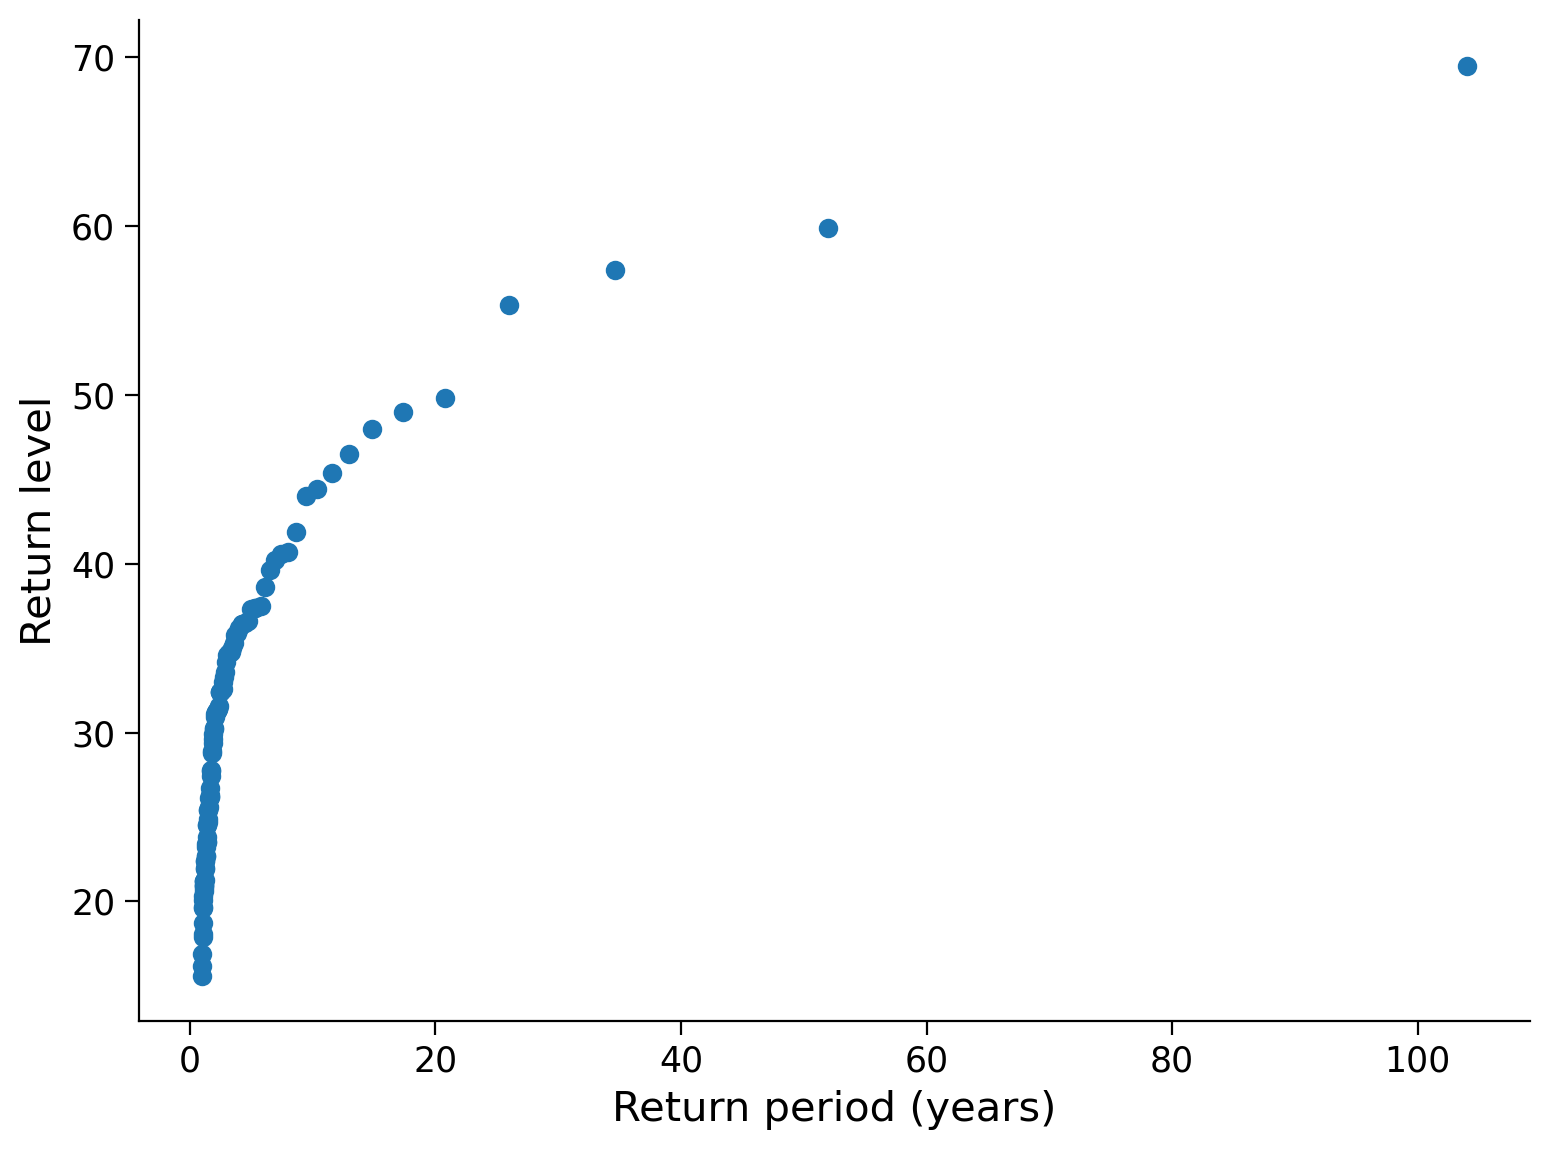

In [17]:
# plot the results
fig,ax=plt.subplots()
ax.plot(precip_df['period'],precip_df['sorted'],'o')
ax.set_xlabel('Return period (years)')
ax.set_ylabel('Return level')
ax.set_xscale('linear') # notice the xscale 

## Coding Exercise: 

1. Frequently, we discuss return levels using a logarithmic scale, specifically referring to events with return periods of 1 year, 10 years, and 100 years. Let's modify the plot above by changing the x-axis to a logarithmic scale. By doing so, we can better understand the perception of the plot. How does this adjustment affect our interpretation of the data?

2. It is important to note that the plot represents just a single data record, which means our estimate of "extreme values" relies on a limited number of data points. Considering this, how confident can we be about the return periods or levels of extreme values based on this plot? What measures can be taken to enhance the robustness of the estimate?

3. Optional: If you have any ideas on how to address the limitations mentioned in (2), feel free to explore and share your thoughts.

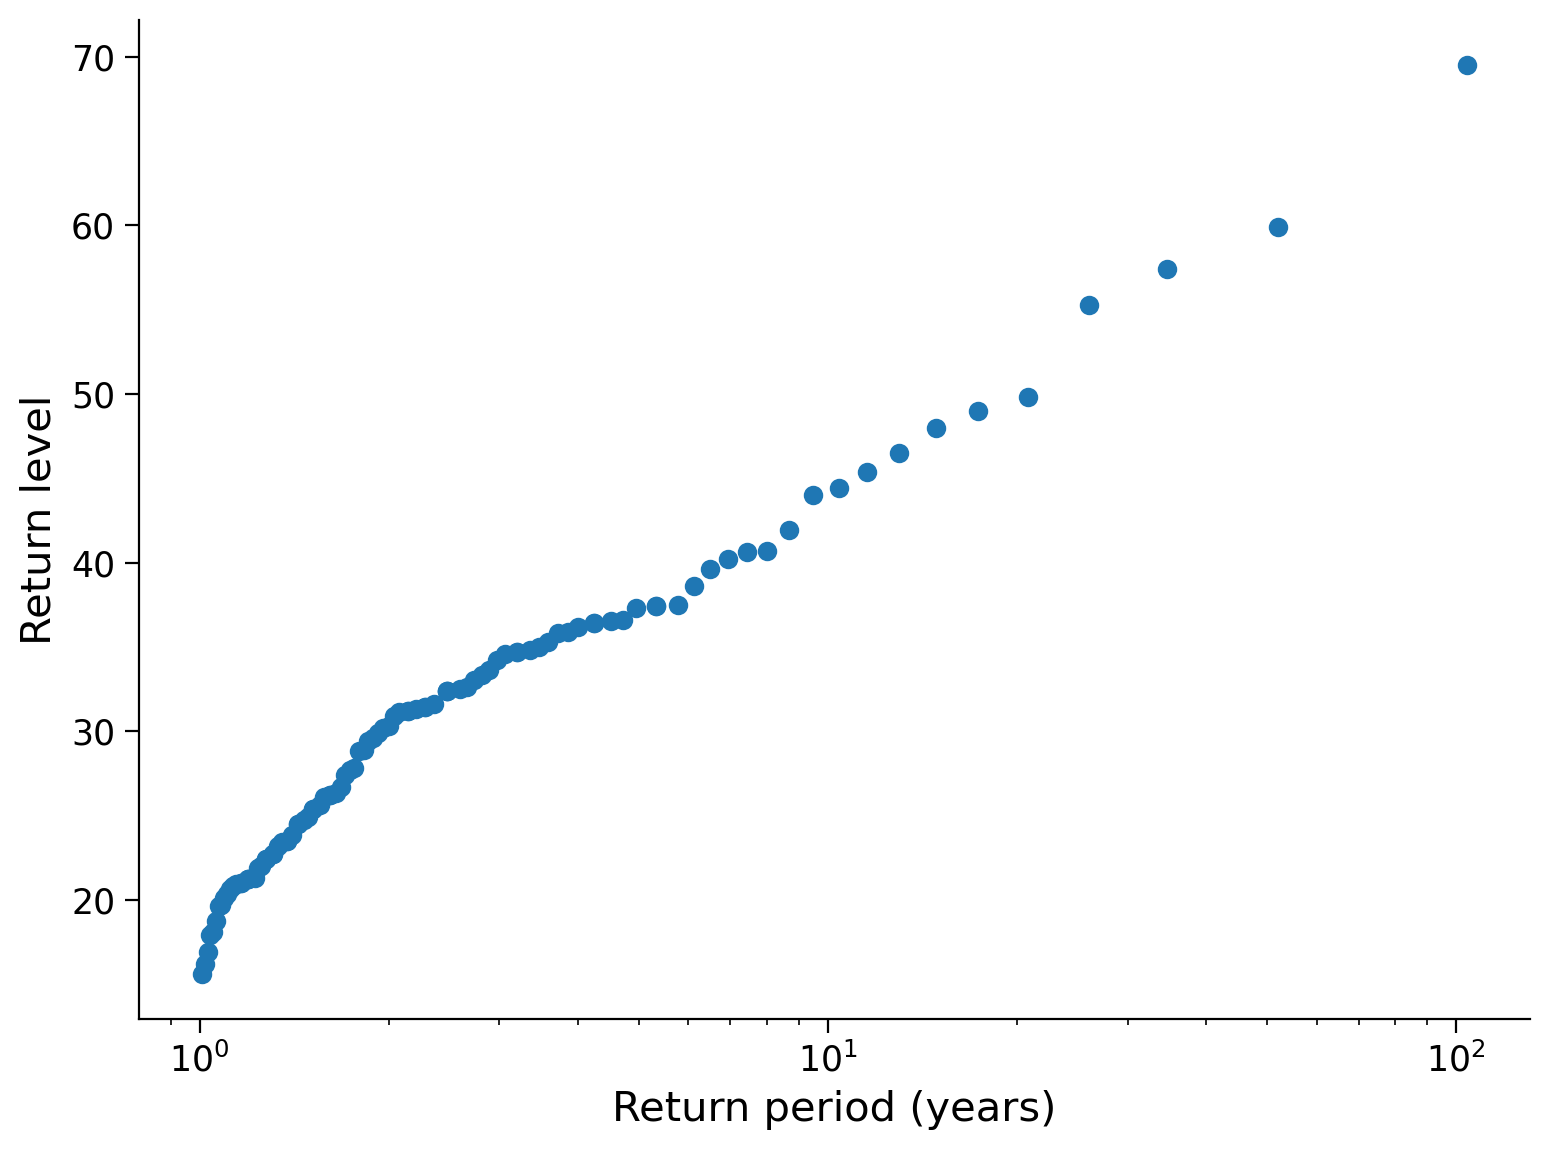

In [18]:
# to_remove solution
fig,ax=plt.subplots()
ax.plot(precip_df['period'],precip_df['sorted'],'o')
ax.set_xlabel('Return period (years)')
ax.set_ylabel('Return level')
ax.set_xscale('log') # change the xscale 



### solution part 3 (optional):

In [19]:
# to remove solution

def empirical_period(data):
    df = pd.DataFrame(index=np.arange(data.size))
    df['sorted'] = np.sort(data)[::-1]
    df['ranks'] = np.arange(data.size)
    df['ranks_sp'] = np.sort(stats.rankdata(-data))
    n = data.size
    P = df['ranks_sp']/(n+1)
    df['exceedance'] = P
    df['period'] = 1 / df['exceedance']

    return df[['period','sorted']].set_index('period')['sorted']

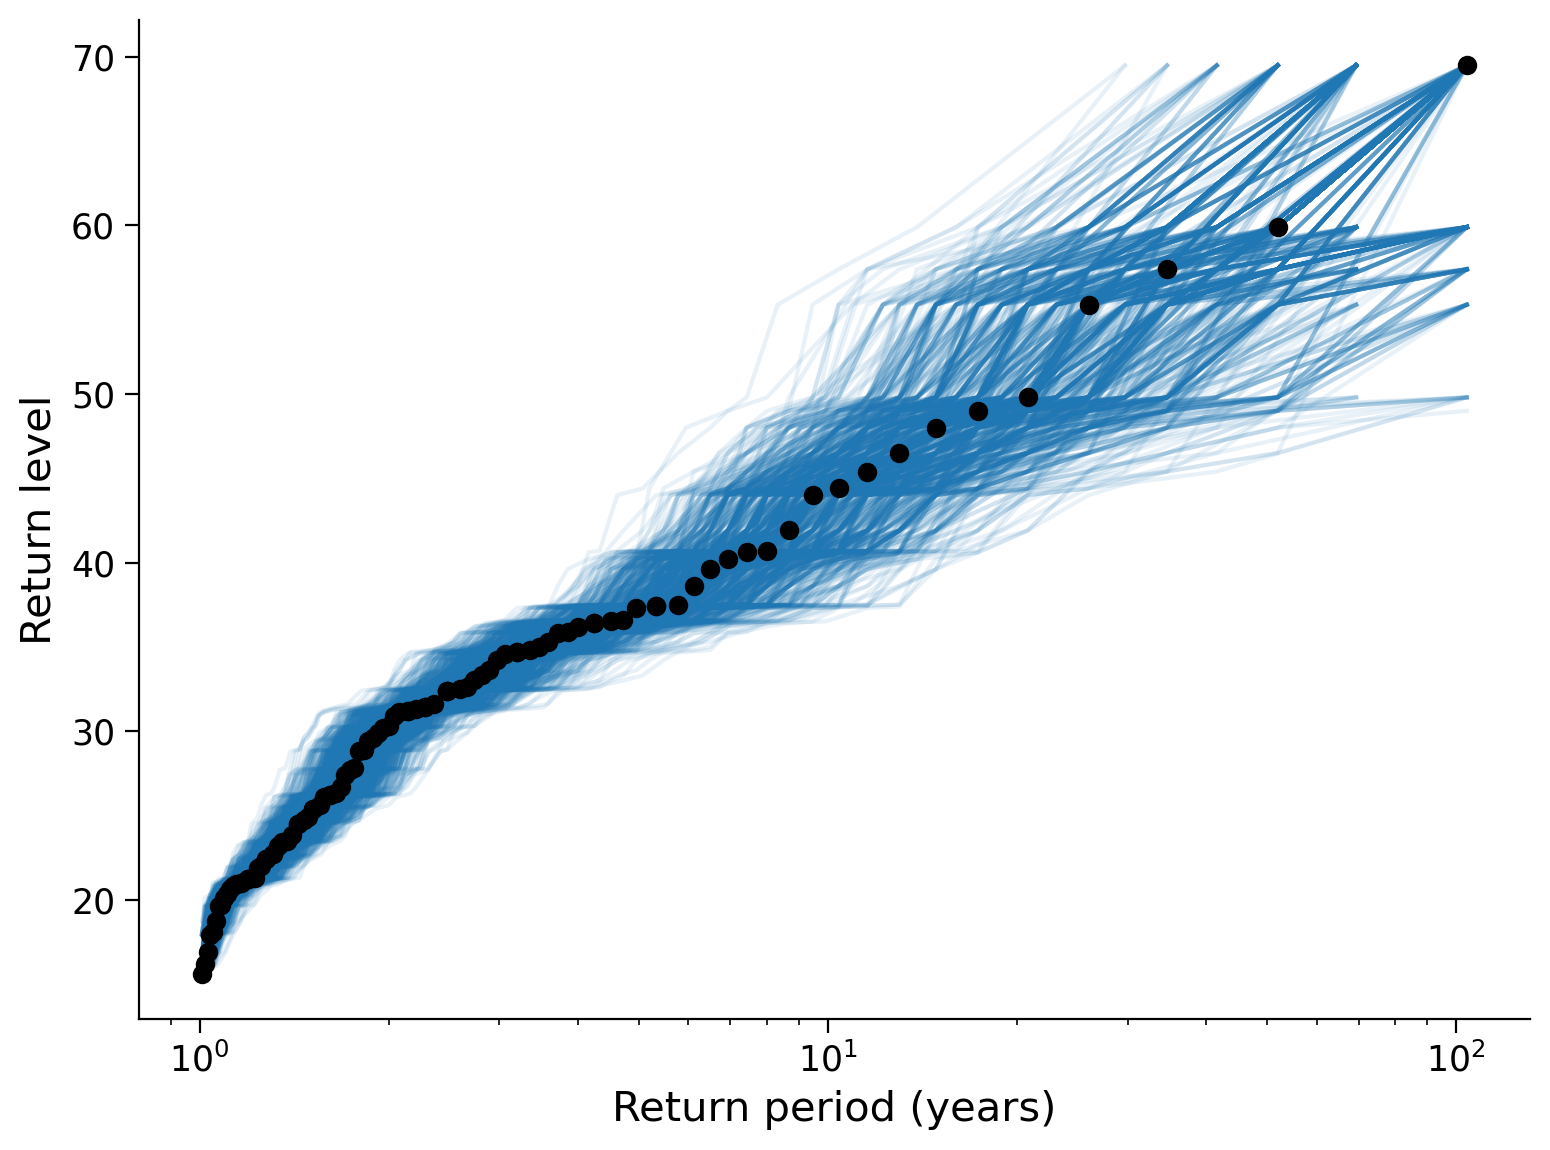

In [21]:
# to remove solution
fix,ax=plt.subplots()
for i in range(1000):
    empirical_period(
        # data.precipitation.values
        np.random.choice(data.precipitation.values,size=data.precipitation.size,replace=True)
        ).plot(style='C0-',alpha=0.1,ax=ax)

ax.plot(precip_df['period'],precip_df['sorted'],'ko')
ax.set_xlabel('Return period (years)')
ax.set_ylabel('Return level')
ax.set_xscale('log')


# ohad comment: building a random dataset to make the solution more robust? that's faking data. 
# I don't like it at all. Jenna and Chi what do you think?

# **Summary**
In this tutorial, we've learned about the concept of return periods, which represent the expected frequency of a given event, such as a storm or flood, which is important for infrastructure design and policy making. We've explored how to calculate empirical return levels and visualized these using a return-level plot. We ranked precipitation levels in a data set and assigned ranks to each, handling the instances of duplicate values effectively with the `rankdata` function from the `scipy` library. We then computed the empirical probability of exceedance. We also examined the implications of changing the scale of the plot to logarithmic and considered the limitations of estimating extreme values based on a single data record.